In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
test_df = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
identidad=test_df['Id']
test_df=test_df.drop('Id', axis=1)
train_df=train_df.drop('Id', axis=1)


In [7]:
X_train=train_df.drop('SalePrice', axis=1)
y_train= train_df['SalePrice']

In [8]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [9]:
test_df.shape

(1459, 79)

In [10]:
X_train= X_train.loc[:, X_train.isnull().mean()<.2]

In [11]:
columnas=X_train.columns.tolist()

In [12]:
X_test=test_df[columnas]

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [14]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


In [15]:
pd.set_option('display.max_columns', 400)
pd.set_option('display.max_rows', 150)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

In [16]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0000,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0000,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0000,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0000,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0000,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0000,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0000,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0000,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0000,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0000,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0000,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal


In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [18]:
 mylist = list(X_train.select_dtypes(include=['object']).columns)

In [19]:
num=list(X_train.select_dtypes(include=['int64','float64' ]).columns)

In [20]:
num

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [21]:
mylist 

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [22]:
X_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0000,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0000,TA,TA,CBlock,TA,TA,No,Rec,468.0000,LwQ,144.0000,270.0000,882.0000,GasA,TA,Y,SBrkr,896,0,0,896,0.0000,0.0000,1,0,2,1,TA,5,Typ,0,Attchd,1961.0000,Unf,1.0000,730.0000,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0000,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0000,TA,TA,CBlock,TA,TA,No,ALQ,923.0000,Unf,0.0000,406.0000,1329.0000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0000,0.0000,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0000,Unf,1.0000,312.0000,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0000,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0000,TA,TA,PConc,Gd,TA,No,GLQ,791.0000,Unf,0.0000,137.0000,928.0000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0000,0.0000,2,1,3,1,TA,6,Typ,1,Attchd,1997.0000,Fin,2.0000,482.0000,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0000,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0000,TA,TA,PConc,TA,TA,No,GLQ,602.0000,Unf,0.0000,324.0000,926.0000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0000,0.0000,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0000,Fin,2.0000,470.0000,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0000,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0000,Gd,TA,PConc,Gd,TA,No,ALQ,263.0000,Unf,0.0000,1017.0000,1280.0000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0000,0.0000,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0000,RFn,2.0000,506.0000,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0000,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0000,TA,TA,CBlock,TA,TA,No,Unf,0.0000,Unf,0.0000,546.0000,546.0000,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0000,0.0000,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,Y,0,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0000,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0000,TA,TA,CBlock,TA,TA,No,Rec,252.0000,Unf,0.0000,294.0000,546.0000,GasA,TA,Y,SBrkr,546,546,0,1092,0.0000,0.0000,1,1,3,1,TA,6,Typ,0,CarPort,1970.0000,Unf,1.0000,286.0000,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0000,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0000,TA,TA,CBlock,TA,TA,No,ALQ,1224.0000,Unf,0.0000,0.0000,1224.0000,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0000,0.0000,1,0,4,1,TA,7,Typ,1,Detchd,1960.0000,Unf,2.0000,576.0000,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0000,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Sh

In [23]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.0000,1201.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1452.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1379.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000
mean,56.8973,70.0500,10516.8281,6.0993,5.5753,1971.2678,1984.8658,103.6853,443.6397,46.5493,567.2404,1057.4295,1162.6267,346.9925,5.8445,1515.4637,0.4253,0.0575,1.5651,0.3829,2.8664,1.0466,6.5178,0.6130,1978.5062,1.7671,472.9801,94.2445,46.6603,21.9541,3.4096,15.0610,2.7589,43.4890,6.3219,2007.8158
std,42.3006,24.2848,9981.2649,1.3830,1.1128,30.2029,20.6454,181.0662,456.0981,161.3193,441.8670,438.7053,386.5877,436.5284,48.6231,525.4804,0.5189,0.2388,0.5509,0.5029,0.8158,0.2203,1.6254,0.6447,24.6897,0.7473,213.8048,125.3388,66.2560,61.1191,29.3173,55.7574,40.1773,496.1230,2.7036,1.3281
min,20.0000,21.0000,1300.0000,1.0000,1.0000,1872.0000,1950.0000,0.0000,0.0000,0.0000,0.0000,0.0000,334.0000,0.0000,0.0000,334.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,1900.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2006.0000
25%,20.0000,59.0000,7553.5000,5.0000,5.0000,1954.0000,1967.0000,0.0000,0.0000,0.0000,223.0000,795.7500,882.0000,0.0000,0.0000,1129.5000,0.0000,0.0000,1.0000,0.0000,2.0000,1.0000,5.0000,0.0000,1961.0000,1.0000,334.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,2007.0000
50%,50.0000,69.0000,9478.5000,6.0000,5.0000,1973.0000,1994.0000,0.0000,383.5000,0.0000,477.5000,991.5000,1087.0000,0.0000,0.0000,1464.0000,0.0000,0.0000,2.0000,0.0000,3.0000,1.0000,6.0000,1.0000,1980.0000,2.0000,480.0000,0.0000,25.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000,2008.0000
75%,70.0000,80.0000,11601.5000,7.0000,6.0000,2000.0000,2004.0000,166.0000,712.2500,0.0000,808.0000,1298.2500,1391.2500,728.0000,0.0000,1776.7500,1.0000,0.0000,2.0000,1.0000,3.0000,1.0000,7.0000,1.0000,2002.0000,2.0000,576.0000,168.0000,68.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,2009.0000
max,190.0000,313.0000,215245.0000,10.0000,9.0000,2010.0000,2010.0000,1600.0000,5644.0000,1474.0000,2336.0000,6110.0000,4692.0000,2065.0000,572.0000,5642.0000,3.0000,2.0000,3.0000,2.0000,8.0000,3.0000,14.0000,3.0000,2010.0000,4.0000,1418.0000,857.0000,547.0000,552.0000,508.0000,480.0000,738.0000,15500.0000,12.0000,2010.0000


In [24]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median', missing_values=np.nan)

imputer.fit(X_train[num])

X_train[num] = imputer.transform(X_train[num])

X_test[num] = imputer.transform(X_test[num])

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [25]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000
mean,56.8973,69.8637,10516.8281,6.0993,5.5753,1971.2678,1984.8658,103.1171,443.6397,46.5493,567.2404,1057.4295,1162.6267,346.9925,5.8445,1515.4637,0.4253,0.0575,1.5651,0.3829,2.8664,1.0466,6.5178,0.6130,1978.5890,1.7671,472.9801,94.2445,46.6603,21.9541,3.4096,15.0610,2.7589,43.4890,6.3219,2007.8158
std,42.3006,22.0277,9981.2649,1.3830,1.1128,30.2029,20.6454,180.7314,456.0981,161.3193,441.8670,438.7053,386.5877,436.5284,48.6231,525.4804,0.5189,0.2388,0.5509,0.5029,0.8158,0.2203,1.6254,0.6447,23.9970,0.7473,213.8048,125.3388,66.2560,61.1191,29.3173,55.7574,40.1773,496.1230,2.7036,1.3281
min,20.0000,21.0000,1300.0000,1.0000,1.0000,1872.0000,1950.0000,0.0000,0.0000,0.0000,0.0000,0.0000,334.0000,0.0000,0.0000,334.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,1900.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2006.0000
25%,20.0000,60.0000,7553.5000,5.0000,5.0000,1954.0000,1967.0000,0.0000,0.0000,0.0000,223.0000,795.7500,882.0000,0.0000,0.0000,1129.5000,0.0000,0.0000,1.0000,0.0000,2.0000,1.0000,5.0000,0.0000,1962.0000,1.0000,334.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,2007.0000
50%,50.0000,69.0000,9478.5000,6.0000,5.0000,1973.0000,1994.0000,0.0000,383.5000,0.0000,477.5000,991.5000,1087.0000,0.0000,0.0000,1464.0000,0.0000,0.0000,2.0000,0.0000,3.0000,1.0000,6.0000,1.0000,1980.0000,2.0000,480.0000,0.0000,25.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000,2008.0000
75%,70.0000,79.0000,11601.5000,7.0000,6.0000,2000.0000,2004.0000,164.2500,712.2500,0.0000,808.0000,1298.2500,1391.2500,728.0000,0.0000,1776.7500,1.0000,0.0000,2.0000,1.0000,3.0000,1.0000,7.0000,1.0000,2001.0000,2.0000,576.0000,168.0000,68.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,2009.0000
max,190.0000,313.0000,215245.0000,10.0000,9.0000,2010.0000,2010.0000,1600.0000,5644.0000,1474.0000,2336.0000,6110.0000,4692.0000,2065.0000,572.0000,5642.0000,3.0000,2.0000,3.0000,2.0000,8.0000,3.0000,14.0000,3.0000,2010.0000,4.0000,1418.0000,857.0000,547.0000,552.0000,508.0000,480.0000,738.0000,15500.0000,12.0000,2010.0000


In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   float64
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

In [27]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)

imputer.fit(X_train[mylist])

X_train[mylist] = imputer.transform(X_train[mylist])

X_test[mylist] = imputer.transform(X_test[mylist])

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [28]:
unique_category = []
for i in X_train[mylist].columns:
    if X_train[i].unique().shape[0] <= 7:
        unique_category.append(i)
        print(i, X_train[i].unique(), "\n")
        

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street ['Pave' 'Grvl'] 

LotShape ['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour ['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities ['AllPub' 'NoSeWa'] 

LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope ['Gtl' 'Mod' 'Sev'] 

BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 

MasVnrType ['BrkFace' 'None' 'Stone' 'BrkCmn'] 

ExterQual ['Gd' 'TA' 'Ex' 'Fa'] 

ExterCond ['TA' 'Gd' 'Fa' 'Po' 'Ex'] 

Foundation ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone'] 

BsmtQual ['Gd' 'TA' 'Ex' 'Fa'] 

BsmtCond ['TA' 'Gd' 'Fa' 'Po'] 

BsmtExposure ['No' 'Gd' 'Mn' 'Av'] 

BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'LwQ'] 

BsmtFinType2 ['Unf' 'BLQ' 'ALQ' 'Rec' 'LwQ' 'GLQ'] 

Heating ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor'] 

HeatingQC ['Ex' 'Gd' 'TA' 'Fa' 'Po'] 

CentralAir ['Y' 'N'] 

Electrical ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix'] 

KitchenQual ['Gd' 'TA' 'Ex' 'Fa'] 

Functional ['Typ' 'M

In [29]:
unique_category = []
for i in X_train[mylist].columns:
    if X_train[i].unique().shape[0] >= 8:
        unique_category.append(i)
        print(i, X_train[i].unique(), "\n")
        

Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile'] 

Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock'] 

Exterior2nd ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock'] 

SaleType ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth'] 



In [30]:
lista=['Neighborhood','Condition1','Condition2','HouseStyle','RoofMatl','Exterior1st','Exterior2nd', 'SaleType']

In [31]:
cols = [col for col in X_train[mylist].columns if col not in lista]

In [32]:
X_train[cols]
X_test[cols]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,RoofStyle,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,Gable,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,1Fam,Hip,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,1Fam,Gable,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,1Fam,Gable,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,TwnhsE,Gable,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,Twnhs,Gable,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,Normal
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,TwnhsE,Gable,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,CarPort,Unf,TA,TA,Y,Abnorml
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,Gable,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,Abnorml
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,Gable,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,Normal


In [33]:
X_train[lista]
X_test[lista]

,Neighborhood,Condition1,Condition2,HouseStyle,RoofMatl,Exterior1st,Exterior2nd,SaleType
0,NAmes,Feedr,Norm,1Story,CompShg,VinylSd,VinylSd,WD
1,NAmes,Norm,Norm,1Story,CompShg,Wd Sdng,Wd Sdng,WD
2,Gilbert,Norm,Norm,2Story,CompShg,VinylSd,VinylSd,WD
3,Gilbert,Norm,Norm,2Story,CompShg,VinylSd,VinylSd,WD
4,StoneBr,Norm,Norm,1Story,CompShg,HdBoard,HdBoard,WD
...,...,...,...,...,...,...,...,...
1454,MeadowV,Norm,Norm,2Story,CompShg,CemntBd,CmentBd,WD
1455,MeadowV,Norm,Norm,2Story,CompShg,CemntBd,CmentBd,WD
1456,Mitchel,Norm,Norm,1Story,CompShg,VinylSd,VinylSd,WD
1457,Mitchel,Norm,Norm,SFoyer,CompShg,HdBoard,Wd Shng,WD


In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   float64
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

In [35]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   float64
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   float64
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   float64
 16  OverallCond    1459 non-null   float64
 17  YearBuilt      1459 non-null   float64
 18  YearRemo

In [36]:
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.woe import WOEEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.sum_coding import SumEncoder
from category_encoders.m_estimate import MEstimateEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.helmert import HelmertEncoder
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.james_stein import JamesSteinEncoder
from category_encoders.one_hot import OneHotEncoder
CBE_encoder = CatBoostEncoder()
train_cbe = CBE_encoder.fit_transform(X_train[lista], y_train)
test_cbe = CBE_encoder.transform(X_test[lista])

In [37]:
train_cbe

,Neighborhood,Condition1,Condition2,HouseStyle,RoofMatl,Exterior1st,Exterior2nd,SaleType
0,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959
1,180921.1959,180921.1959,194710.5979,180921.1959,194710.5979,180921.1959,180921.1959,194710.5979
2,194710.5979,194710.5979,190307.0653,194710.5979,190307.0653,194710.5979,194710.5979,190307.0653
3,180921.1959,204307.0653,198605.2990,204307.0653,198605.2990,180921.1959,180921.1959,198605.2990
4,180921.1959,188230.2990,186884.2392,188230.2990,186884.2392,204307.0653,204307.0653,186884.2392
...,...,...,...,...,...,...,...,...
1455,192929.4582,184477.7995,181144.7517,209937.9644,179775.0155,213744.3984,214444.2087,173349.1078
1456,188651.7287,184470.2595,181140.4904,176031.4271,179771.6787,175673.1314,167907.6070,173350.4139
1457,208946.7097,184490.5534,181160.4901,209859.4521,179792.7878,230287.7245,228667.5199,173379.3859
1458,146019.5075,184555.6920,181219.5895,176078.2803,179853.2953,149598.5236,149984.4635,173452.9409


In [38]:
test_cbe

,Neighborhood,Condition1,Condition2,HouseStyle,RoofMatl,Exterior1st,Exterior2nd,SaleType
0,146002.2752,142944.3317,181169.2339,175992.2671,179804.4580,213669.3124,214366.1014,173407.7667
1,146002.2752,184492.6576,181169.2339,175992.2671,179804.4580,149991.7884,148550.3848,173407.7667
2,192705.3399,184492.6576,181169.2339,209986.4489,179804.4580,213669.3124,214366.1014,173407.7667
3,192705.3399,184492.6576,181169.2339,209986.4489,179804.4580,213669.3124,214366.1014,173407.7667
4,305515.2383,184492.6576,181169.2339,175992.2671,179804.4580,163157.4672,167725.3134,173407.7667
...,...,...,...,...,...,...,...,...
1454,103151.1775,184492.6576,181169.2339,209986.4489,179804.4580,230871.7935,229287.7245,173407.7667
1455,103151.1775,184492.6576,181169.2339,209986.4489,179804.4580,230871.7935,229287.7245,173407.7667
1456,156763.1439,184492.6576,181169.2339,175992.2671,179804.4580,213669.3124,214366.1014,173407.7667
1457,156763.1439,184492.6576,181169.2339,136280.9788,179804.4580,163157.4672,161831.3127,173407.7667


In [39]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X_train[num])
X_train[num] = transformer.transform(X_train[num])
X_test[num] = transformer.transform(X_test[num])

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [40]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
transformer = enc.fit(X_train[cols])
X_train[cols] = transformer.transform(X_train[cols])
X_test[cols] = transformer.transform(X_test[cols])


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [41]:
X_train[cols]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,RoofStyle,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleCondition
0,3.0000,1.0000,3.0000,3.0000,0.0000,4.0000,0.0000,0.0000,1.0000,1.0000,2.0000,4.0000,2.0000,2.0000,3.0000,3.0000,2.0000,5.0000,1.0000,0.0000,1.0000,4.0000,2.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000
1,3.0000,1.0000,3.0000,3.0000,0.0000,2.0000,0.0000,0.0000,1.0000,2.0000,3.0000,4.0000,1.0000,2.0000,3.0000,1.0000,0.0000,5.0000,1.0000,0.0000,1.0000,4.0000,3.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000
2,3.0000,1.0000,0.0000,3.0000,0.0000,4.0000,0.0000,0.0000,1.0000,1.0000,2.0000,4.0000,2.0000,2.0000,3.0000,2.0000,2.0000,5.0000,1.0000,0.0000,1.0000,4.0000,2.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000
3,3.0000,1.0000,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,3.0000,4.0000,0.0000,3.0000,1.0000,3.0000,0.0000,5.0000,1.0000,2.0000,1.0000,4.0000,2.0000,6.0000,5.0000,2.0000,4.0000,4.0000,2.0000,0.0000
4,3.0000,1.0000,0.0000,3.0000,0.0000,2.0000,0.0000,0.0000,1.0000,1.0000,2.0000,4.0000,2.0000,2.0000,3.0000,0.0000,2.0000,5.0000,1.0000,0.0000,1.0000,4.0000,2.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3.0000,1.0000,3.0000,3.0000,0.0000,4.0000,0.0000,0.0000,1.0000,2.0000,3.0000,4.0000,2.0000,2.0000,3.0000,3.0000,5.0000,5.0000,1.0000,0.0000,1.0000,4.0000,3.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000
1456,3.0000,1.0000,3.0000,3.0000,0.0000,4.0000,0.0000,0.0000,1.0000,3.0000,3.0000,4.0000,1.0000,2.0000,3.0000,3.0000,0.0000,4.0000,1.0000,4.0000,1.0000,4.0000,3.0000,2.0000,1.0000,2.0000,4.0000,4.0000,2.0000,4.0000
1457,3.0000,1.0000,3.0000,3.0000,0.0000,4.0000,0.0000,0.0000,1.0000,2.0000,0.0000,2.0000,4.0000,3.0000,1.0000,3.0000,2.0000,5.0000,1.0000,0.0000,1.0000,4.0000,2.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000
1458,3.0000,1.0000,3.0000,3.0000,0.0000,4.0000,0.0000,0.0000,3.0000,2.0000,3.0000,4.0000,1.0000,3.0000,3.0000,2.0000,2.0000,4.0000,1.0000,2.0000,1.0000,0.0000,2.0000,6.0000,1.0000,2.0000,4.0000,4.0000,2.0000,4.0000


In [42]:
X_test[cols]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,RoofStyle,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleCondition
0,2.0000,1.0000,3.0000,3.0000,0.0000,4.0000,0.0000,0.0000,1.0000,2.0000,3.0000,4.0000,1.0000,3.0000,3.0000,3.0000,4.0000,3.0000,1.0000,4.0000,1.0000,4.0000,3.0000,6.0000,1.0000,2.0000,4.0000,4.0000,2.0000,4.0000
1,3.0000,1.0000,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000,3.0000,1.0000,3.0000,4.0000,1.0000,3.0000,3.0000,3.0000,0.0000,5.0000,1.0000,4.0000,1.0000,4.0000,2.0000,6.0000,1.0000,2.0000,4.0000,4.0000,2.0000,4.0000
2,3.0000,1.0000,0.0000,3.0000,0.0000,4.0000,0.0000,0.0000,1.0000,2.0000,3.0000,4.0000,2.0000,2.0000,3.0000,3.0000,2.0000,5.0000,1.0000,2.0000,1.0000,4.0000,3.0000,6.0000,1.0000,0.0000,4.0000,4.0000,2.0000,4.0000
3,3.0000,1.0000,0.0000,3.0000,0.0000,4.0000,0.0000,0.0000,1.0000,1.0000,3.0000,4.0000,2.0000,3.0000,3.0000,3.0000,2.0000,5.0000,1.0000,0.0000,1.0000,4.0000,2.0000,6.0000,1.0000,0.0000,4.0000,4.0000,2.0000,4.0000
4,3.0000,1.0000,0.0000,1.0000,0.0000,4.0000,0.0000,4.0000,1.0000,2.0000,2.0000,4.0000,2.0000,2.0000,3.0000,3.0000,0.0000,5.0000,1.0000,0.0000,1.0000,4.0000,2.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4.0000,1.0000,3.0000,3.0000,0.0000,4.0000,0.0000,3.0000,1.0000,2.0000,3.0000,4.0000,1.0000,3.0000,3.0000,3.0000,5.0000,5.0000,1.0000,2.0000,1.0000,4.0000,3.0000,6.0000,1.0000,2.0000,4.0000,4.0000,2.0000,4.0000
1455,4.0000,1.0000,3.0000,3.0000,0.0000,4.0000,0.0000,4.0000,1.0000,2.0000,3.0000,4.0000,1.0000,3.0000,3.0000,3.0000,4.0000,5.0000,1.0000,4.0000,1.0000,4.0000,3.0000,6.0000,4.0000,2.0000,4.0000,4.0000,2.0000,0.0000
1456,3.0000,1.0000,3.0000,3.0000,0.0000,4.0000,0.0000,0.0000,1.0000,2.0000,3.0000,4.0000,1.0000,3.0000,3.0000,3.0000,0.0000,5.0000,1.0000,0.0000,1.0000,4.0000,3.0000,6.0000,5.0000,2.0000,4.0000,4.0000,2.0000,0.0000
1457,3.0000,1.0000,3.0000,3.0000,0.0000,4.0000,0.0000,0.0000,1.0000,2.0000,3.0000,4.0000,2.0000,2.0000,3.0000,0.0000,2.0000,5.0000,1.0000,4.0000,1.0000,4.0000,3.0000,6.0000,1.0000,2.0000,4.0000,4.0000,2.0000,4.0000


In [43]:
X_train_1= pd.concat([X_train[num], train_cbe,X_train[cols]], axis=1)
X_test_1= pd.concat([X_test[num], test_cbe,X_test[cols]], axis=1)

In [44]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   float64
 3   OverallQual    1460 non-null   float64
 4   OverallCond    1460 non-null   float64
 5   YearBuilt      1460 non-null   float64
 6   YearRemodAdd   1460 non-null   float64
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   float64
 9   BsmtFinSF2     1460 non-null   float64
 10  BsmtUnfSF      1460 non-null   float64
 11  TotalBsmtSF    1460 non-null   float64
 12  1stFlrSF       1460 non-null   float64
 13  2ndFlrSF       1460 non-null   float64
 14  LowQualFinSF   1460 non-null   float64
 15  GrLivArea      1460 non-null   float64
 16  BsmtFullBath   1460 non-null   float64
 17  BsmtHalfBath   1460 non-null   float64
 18  FullBath

In [45]:
X_test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   float64
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   float64
 3   OverallQual    1459 non-null   float64
 4   OverallCond    1459 non-null   float64
 5   YearBuilt      1459 non-null   float64
 6   YearRemodAdd   1459 non-null   float64
 7   MasVnrArea     1459 non-null   float64
 8   BsmtFinSF1     1459 non-null   float64
 9   BsmtFinSF2     1459 non-null   float64
 10  BsmtUnfSF      1459 non-null   float64
 11  TotalBsmtSF    1459 non-null   float64
 12  1stFlrSF       1459 non-null   float64
 13  2ndFlrSF       1459 non-null   float64
 14  LowQualFinSF   1459 non-null   float64
 15  GrLivArea      1459 non-null   float64
 16  BsmtFullBath   1459 non-null   float64
 17  BsmtHalfBath   1459 non-null   float64
 18  FullBath

In [46]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=100):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:]

pairs_corr = get_top_abs_correlations(pd.concat([X_train_1, y_train],axis=1))

data = pd.DataFrame(pairs_corr).reset_index()
data.columns = ["Variable_A", "Variable_B", "Corr"]

display(data)
mask = data["Corr"] >.8
display(data[mask])
cols_to_drop = data.loc[mask,"Variable_B"].drop_duplicates().tolist()
cols_to_drop

,Variable_A,Variable_B,Corr
0,Exterior1st,Exterior2nd,0.9261
1,GarageCars,GarageArea,0.8825
2,GrLivArea,TotRmsAbvGrd,0.8255
3,TotalBsmtSF,1stFlrSF,0.8195
4,OverallQual,SalePrice,0.7910
...,...,...,...
2770,MSZoning,RoofStyle,0.0003
2771,LotFrontage,MiscVal,0.0003
2772,ScreenPorch,Heating,0.0002
2773,BsmtFullBath,3SsnPorch,0.0001


,Variable_A,Variable_B,Corr
0,Exterior1st,Exterior2nd,0.9261
1,GarageCars,GarageArea,0.8825
2,GrLivArea,TotRmsAbvGrd,0.8255
3,TotalBsmtSF,1stFlrSF,0.8195


['Exterior2nd', 'GarageArea', 'TotRmsAbvGrd', '1stFlrSF']

In [47]:
X_train = X_train_1[X_train_1.columns[~X_train_1.columns.isin(cols_to_drop)]]
X_test = X_test_1[X_test_1.columns[~X_test_1.columns.isin(cols_to_drop)]]

In [48]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Neighborhood,Condition1,Condition2,HouseStyle,RoofMatl,Exterior1st,SaleType,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,RoofStyle,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleCondition
0,0.2000,-0.2105,-0.2541,0.5000,0.0000,0.6522,0.2432,1.1933,0.4528,0.0000,-0.5598,-0.2697,1.1731,0.0000,0.3801,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,-1.0000,0.5897,0.0000,0.0000,0.5294,0.0000,0.0000,0.0000,0.0000,0.0000,-1.3333,0.0000,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,3.0000,1.0000,3.0000,3.0000,0.0000,4.0000,0.0000,0.0000,1.0000,1.0000,2.0000,4.0000,2.0000,2.0000,3.0000,3.0000,2.0000,5.0000,1.0000,0.0000,1.0000,4.0000,2.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000
1,-0.6000,0.5789,0.0300,0.0000,3.0000,0.0652,-0.4865,0.0000,0.8347,0.0000,-0.3308,0.5383,0.0000,0.0000,-0.3121,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.1026,0.0000,1.7738,-0.3676,0.0000,0.0000,0.0000,0.0000,0.0000,-0.3333,-0.5000,180921.1959,180921.1959,194710.5979,180921.1959,194710.5979,180921.1959,194710.5979,3.0000,1.0000,3.0000,3.0000,0.0000,2.0000,0.0000,0.0000,1.0000,2.0000,3.0000,4.0000,1.0000,2.0000,3.0000,1.0000,0.0000,5.0000,1.0000,0.0000,1.0000,4.0000,3.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000
2,0.2000,-0.0526,0.4376,0.5000,0.0000,0.6087,0.2162,0.9863,0.1439,0.0000,-0.0744,-0.1423,1.1896,0.0000,0.4975,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.5385,0.0000,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,194710.5979,194710.5979,190307.0653,194710.5979,190307.0653,194710.5979,190307.0653,3.0000,1.0000,0.0000,3.0000,0.0000,4.0000,0.0000,0.0000,1.0000,1.0000,2.0000,4.0000,2.0000,2.0000,3.0000,2.0000,2.0000,5.0000,1.0000,0.0000,1.0000,4.0000,2.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000
3,0.4000,-0.4737,0.0177,0.5000,0.0000,-1.2609,-0.6486,0.0000,-0.2352,0.0000,0.1068,-0.4687,1.0385,0.0000,0.3909,1.0000,0.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,0.4615,1.0000,0.0000,0.1471,272.0000,0.0000,0.0000,0.0000,0.0000,-1.3333,-1.0000,180921.1959,204307.0653,198605.2990,204307.0653,198605.2990,180921.1959,198605.2990,3.0000,1.0000,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,3.0000,4.0000,0.0000,3.0000,1.0000,3.0000,0.0000,5.0000,1.0000,2.0000,1.0000,4.0000,2.0000,6.0000,5.0000,2.0000,4.0000,4.0000,2.0000,0.0000
4,0.2000,0.7895,1.1812,1.0000,0.0000,0.5870,0.1622,2.1309,0.3812,0.0000,0.0214,0.3055,1.4464,0.0000,1.1340,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.5128,1.0000,1.1429,0.8676,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,180921.1959,188230.2990,186884.2392,188230.2990,186884.2392,204307.0653,186884.2392,3.0000,1.0000,0.0000,3.0000,0.0000,2.0000,0.0000,0.0000,1.0000,1.0000,2.0000,4.0000,2.0000,2.0000,3.0000,0.0000,2.0000,5.0000,1.0000,0.0000,1.0000,4.0000,2.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.2000,-0.3684,-0.3857,0.0000,0.0000,0.5652,0.1622,0.0000,-0.5384,0.0000,0.8128,-0.0766,0.9533,0.0000,0.2827,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.4872,0.0000,0.0000,0.2206,0.0000,0.0000,0.0000,0.0000,0.0000,0.6667,-0.5000,192929.4582,184477.7995,181144.7517,209937.9644,179775.015

In [49]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Neighborhood,Condition1,Condition2,HouseStyle,RoofMatl,Exterior1st,SaleType,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,RoofStyle,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleCondition
0,-0.6000,0.5789,0.5295,-0.5000,1.0000,-0.2609,-0.8919,0.0000,0.1186,144.0000,-0.3547,-0.2179,0.0000,0.0000,-0.8776,0.0000,0.0000,-1.0000,0.0000,-1.0000,0.0000,-1.0000,-0.4872,-1.0000,0.8333,-0.3676,0.0000,0.0000,120.0000,0.0000,0.0000,0.0000,1.0000,146002.2752,142944.3317,181169.2339,175992.2671,179804.4580,213669.3124,173407.7667,2.0000,1.0000,3.0000,3.0000,0.0000,4.0000,0.0000,0.0000,1.0000,2.0000,3.0000,4.0000,1.0000,3.0000,3.0000,3.0000,4.0000,3.0000,1.0000,4.0000,1.0000,4.0000,3.0000,6.0000,1.0000,2.0000,4.0000,4.0000,2.0000,4.0000
1,-0.6000,0.6316,1.1829,0.0000,1.0000,-0.3261,-0.9730,0.6575,0.7575,0.0000,-0.1222,0.6716,0.0000,0.0000,-0.2086,0.0000,0.0000,-1.0000,1.0000,0.0000,0.0000,-1.0000,-0.5641,-1.0000,2.3393,0.1618,0.0000,0.0000,0.0000,0.0000,12500.0000,0.0000,1.0000,146002.2752,184492.6576,181169.2339,175992.2671,179804.4580,149991.7884,173407.7667,3.0000,1.0000,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000,3.0000,1.0000,3.0000,4.0000,1.0000,3.0000,3.0000,3.0000,0.0000,5.0000,1.0000,4.0000,1.0000,4.0000,2.0000,6.0000,1.0000,2.0000,4.0000,4.0000,2.0000,4.0000
2,0.2000,0.2632,1.0750,-0.5000,0.0000,0.5217,0.1081,0.0000,0.5721,0.0000,-0.5821,-0.1264,0.9629,0.0000,0.2549,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.4359,0.0000,1.2619,0.1324,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,1.0000,192705.3399,184492.6576,181169.2339,209986.4489,179804.4580,213669.3124,173407.7667,3.0000,1.0000,0.0000,3.0000,0.0000,4.0000,0.0000,0.0000,1.0000,2.0000,3.0000,4.0000,2.0000,2.0000,3.0000,3.0000,2.0000,5.0000,1.0000,2.0000,1.0000,4.0000,3.0000,6.0000,1.0000,0.0000,4.0000,4.0000,2.0000,4.0000
3,0.2000,0.4737,0.1234,0.0000,1.0000,0.5435,0.1081,0.1218,0.3068,0.0000,-0.2624,-0.1303,0.9313,0.0000,0.2163,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.4615,0.0000,2.1429,0.1618,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,192705.3399,184492.6576,181169.2339,209986.4489,179804.4580,213669.3124,173407.7667,3.0000,1.0000,0.0000,3.0000,0.0000,4.0000,0.0000,0.0000,1.0000,1.0000,3.0000,4.0000,2.0000,3.0000,3.0000,3.0000,2.0000,5.0000,1.0000,0.0000,1.0000,4.0000,2.0000,6.0000,1.0000,0.0000,4.0000,4.0000,2.0000,4.0000
4,1.4000,-1.3684,-1.1051,1.0000,0.0000,0.4130,-0.0541,0.0000,-0.1692,0.0000,0.9222,0.5741,0.0000,0.0000,-0.2843,0.0000,0.0000,0.0000,0.0000,-1.0000,0.0000,-1.0000,0.3077,0.0000,0.0000,0.8382,0.0000,0.0000,144.0000,0.0000,0.0000,-1.6667,1.0000,305515.2383,184492.6576,181169.2339,175992.2671,179804.4580,163157.4672,173407.7667,3.0000,1.0000,0.0000,1.0000,0.0000,4.0000,0.0000,4.0000,1.0000,2.0000,2.0000,4.0000,2.0000,2.0000,3.0000,3.0000,0.0000,5.0000,1.0000,0.0000,1.0000,4.0000,2.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.2000,-2.5263,-1.8633,-1.0000,2.0000,-0.0652,-0.6486,0.0000,-0.5384,0.0000,0.1171,-0.8866,0.7500,0.0000,-0.5747,0.0000,0.0000,-1.0000,1.0000,0.0000,0.0000,-1.0000,0.0000,-2.0000,0.0000,-0.3676,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,103151.1775,184492.6576,181169.

In [50]:
!pip install lofo-importance

In [51]:
from sklearn.model_selection import KFold
from lofo import LOFOImportance, Dataset, plot_importance

/opt/conda/lib/python3.7/site-packages/lofo/lofo_importance.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [52]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Neighborhood,Condition1,Condition2,HouseStyle,RoofMatl,Exterior1st,SaleType,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,RoofStyle,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleCondition
0,0.2000,-0.2105,-0.2541,0.5000,0.0000,0.6522,0.2432,1.1933,0.4528,0.0000,-0.5598,-0.2697,1.1731,0.0000,0.3801,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,-1.0000,0.5897,0.0000,0.0000,0.5294,0.0000,0.0000,0.0000,0.0000,0.0000,-1.3333,0.0000,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,3.0000,1.0000,3.0000,3.0000,0.0000,4.0000,0.0000,0.0000,1.0000,1.0000,2.0000,4.0000,2.0000,2.0000,3.0000,3.0000,2.0000,5.0000,1.0000,0.0000,1.0000,4.0000,2.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000
1,-0.6000,0.5789,0.0300,0.0000,3.0000,0.0652,-0.4865,0.0000,0.8347,0.0000,-0.3308,0.5383,0.0000,0.0000,-0.3121,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.1026,0.0000,1.7738,-0.3676,0.0000,0.0000,0.0000,0.0000,0.0000,-0.3333,-0.5000,180921.1959,180921.1959,194710.5979,180921.1959,194710.5979,180921.1959,194710.5979,3.0000,1.0000,3.0000,3.0000,0.0000,2.0000,0.0000,0.0000,1.0000,2.0000,3.0000,4.0000,1.0000,2.0000,3.0000,1.0000,0.0000,5.0000,1.0000,0.0000,1.0000,4.0000,3.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000
2,0.2000,-0.0526,0.4376,0.5000,0.0000,0.6087,0.2162,0.9863,0.1439,0.0000,-0.0744,-0.1423,1.1896,0.0000,0.4975,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.5385,0.0000,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,194710.5979,194710.5979,190307.0653,194710.5979,190307.0653,194710.5979,190307.0653,3.0000,1.0000,0.0000,3.0000,0.0000,4.0000,0.0000,0.0000,1.0000,1.0000,2.0000,4.0000,2.0000,2.0000,3.0000,2.0000,2.0000,5.0000,1.0000,0.0000,1.0000,4.0000,2.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000
3,0.4000,-0.4737,0.0177,0.5000,0.0000,-1.2609,-0.6486,0.0000,-0.2352,0.0000,0.1068,-0.4687,1.0385,0.0000,0.3909,1.0000,0.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,0.4615,1.0000,0.0000,0.1471,272.0000,0.0000,0.0000,0.0000,0.0000,-1.3333,-1.0000,180921.1959,204307.0653,198605.2990,204307.0653,198605.2990,180921.1959,198605.2990,3.0000,1.0000,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,3.0000,4.0000,0.0000,3.0000,1.0000,3.0000,0.0000,5.0000,1.0000,2.0000,1.0000,4.0000,2.0000,6.0000,5.0000,2.0000,4.0000,4.0000,2.0000,0.0000
4,0.2000,0.7895,1.1812,1.0000,0.0000,0.5870,0.1622,2.1309,0.3812,0.0000,0.0214,0.3055,1.4464,0.0000,1.1340,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.5128,1.0000,1.1429,0.8676,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,180921.1959,188230.2990,186884.2392,188230.2990,186884.2392,204307.0653,186884.2392,3.0000,1.0000,0.0000,3.0000,0.0000,2.0000,0.0000,0.0000,1.0000,1.0000,2.0000,4.0000,2.0000,2.0000,3.0000,0.0000,2.0000,5.0000,1.0000,0.0000,1.0000,4.0000,2.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.2000,-0.3684,-0.3857,0.0000,0.0000,0.5652,0.1622,0.0000,-0.5384,0.0000,0.8128,-0.0766,0.9533,0.0000,0.2827,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.4872,0.0000,0.0000,0.2206,0.0000,0.0000,0.0000,0.0000,0.0000,0.6667,-0.5000,192929.4582,184477.7995,181144.7517,209937.9644,179775.015

In [53]:
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
import xgboost as xgb

In [54]:
kfold= StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

In [55]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Neighborhood,Condition1,Condition2,HouseStyle,RoofMatl,Exterior1st,SaleType,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,RoofStyle,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleCondition
0,0.2000,-0.2105,-0.2541,0.5000,0.0000,0.6522,0.2432,1.1933,0.4528,0.0000,-0.5598,-0.2697,1.1731,0.0000,0.3801,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,-1.0000,0.5897,0.0000,0.0000,0.5294,0.0000,0.0000,0.0000,0.0000,0.0000,-1.3333,0.0000,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,3.0000,1.0000,3.0000,3.0000,0.0000,4.0000,0.0000,0.0000,1.0000,1.0000,2.0000,4.0000,2.0000,2.0000,3.0000,3.0000,2.0000,5.0000,1.0000,0.0000,1.0000,4.0000,2.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000
1,-0.6000,0.5789,0.0300,0.0000,3.0000,0.0652,-0.4865,0.0000,0.8347,0.0000,-0.3308,0.5383,0.0000,0.0000,-0.3121,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.1026,0.0000,1.7738,-0.3676,0.0000,0.0000,0.0000,0.0000,0.0000,-0.3333,-0.5000,180921.1959,180921.1959,194710.5979,180921.1959,194710.5979,180921.1959,194710.5979,3.0000,1.0000,3.0000,3.0000,0.0000,2.0000,0.0000,0.0000,1.0000,2.0000,3.0000,4.0000,1.0000,2.0000,3.0000,1.0000,0.0000,5.0000,1.0000,0.0000,1.0000,4.0000,3.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000
2,0.2000,-0.0526,0.4376,0.5000,0.0000,0.6087,0.2162,0.9863,0.1439,0.0000,-0.0744,-0.1423,1.1896,0.0000,0.4975,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.5385,0.0000,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,194710.5979,194710.5979,190307.0653,194710.5979,190307.0653,194710.5979,190307.0653,3.0000,1.0000,0.0000,3.0000,0.0000,4.0000,0.0000,0.0000,1.0000,1.0000,2.0000,4.0000,2.0000,2.0000,3.0000,2.0000,2.0000,5.0000,1.0000,0.0000,1.0000,4.0000,2.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000
3,0.4000,-0.4737,0.0177,0.5000,0.0000,-1.2609,-0.6486,0.0000,-0.2352,0.0000,0.1068,-0.4687,1.0385,0.0000,0.3909,1.0000,0.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,0.4615,1.0000,0.0000,0.1471,272.0000,0.0000,0.0000,0.0000,0.0000,-1.3333,-1.0000,180921.1959,204307.0653,198605.2990,204307.0653,198605.2990,180921.1959,198605.2990,3.0000,1.0000,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,3.0000,4.0000,0.0000,3.0000,1.0000,3.0000,0.0000,5.0000,1.0000,2.0000,1.0000,4.0000,2.0000,6.0000,5.0000,2.0000,4.0000,4.0000,2.0000,0.0000
4,0.2000,0.7895,1.1812,1.0000,0.0000,0.5870,0.1622,2.1309,0.3812,0.0000,0.0214,0.3055,1.4464,0.0000,1.1340,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.5128,1.0000,1.1429,0.8676,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,180921.1959,188230.2990,186884.2392,188230.2990,186884.2392,204307.0653,186884.2392,3.0000,1.0000,0.0000,3.0000,0.0000,2.0000,0.0000,0.0000,1.0000,1.0000,2.0000,4.0000,2.0000,2.0000,3.0000,0.0000,2.0000,5.0000,1.0000,0.0000,1.0000,4.0000,2.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.2000,-0.3684,-0.3857,0.0000,0.0000,0.5652,0.1622,0.0000,-0.5384,0.0000,0.8128,-0.0766,0.9533,0.0000,0.2827,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.4872,0.0000,0.0000,0.2206,0.0000,0.0000,0.0000,0.0000,0.0000,0.6667,-0.5000,192929.4582,184477.7995,181144.7517,209937.9644,179775.015

In [56]:
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [57]:
df= pd.concat([X_train, y_train], axis=1)

In [58]:
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Neighborhood,Condition1,Condition2,HouseStyle,RoofMatl,Exterior1st,SaleType,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,RoofStyle,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleCondition,SalePrice
0,0.2000,-0.2105,-0.2541,0.5000,0.0000,0.6522,0.2432,1.1933,0.4528,0.0000,-0.5598,-0.2697,1.1731,0.0000,0.3801,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,-1.0000,0.5897,0.0000,0.0000,0.5294,0.0000,0.0000,0.0000,0.0000,0.0000,-1.3333,0.0000,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,3.0000,1.0000,3.0000,3.0000,0.0000,4.0000,0.0000,0.0000,1.0000,1.0000,2.0000,4.0000,2.0000,2.0000,3.0000,3.0000,2.0000,5.0000,1.0000,0.0000,1.0000,4.0000,2.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000,208500
1,-0.6000,0.5789,0.0300,0.0000,3.0000,0.0652,-0.4865,0.0000,0.8347,0.0000,-0.3308,0.5383,0.0000,0.0000,-0.3121,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.1026,0.0000,1.7738,-0.3676,0.0000,0.0000,0.0000,0.0000,0.0000,-0.3333,-0.5000,180921.1959,180921.1959,194710.5979,180921.1959,194710.5979,180921.1959,194710.5979,3.0000,1.0000,3.0000,3.0000,0.0000,2.0000,0.0000,0.0000,1.0000,2.0000,3.0000,4.0000,1.0000,2.0000,3.0000,1.0000,0.0000,5.0000,1.0000,0.0000,1.0000,4.0000,3.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000,181500
2,0.2000,-0.0526,0.4376,0.5000,0.0000,0.6087,0.2162,0.9863,0.1439,0.0000,-0.0744,-0.1423,1.1896,0.0000,0.4975,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.5385,0.0000,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,194710.5979,194710.5979,190307.0653,194710.5979,190307.0653,194710.5979,190307.0653,3.0000,1.0000,0.0000,3.0000,0.0000,4.0000,0.0000,0.0000,1.0000,1.0000,2.0000,4.0000,2.0000,2.0000,3.0000,2.0000,2.0000,5.0000,1.0000,0.0000,1.0000,4.0000,2.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000,223500
3,0.4000,-0.4737,0.0177,0.5000,0.0000,-1.2609,-0.6486,0.0000,-0.2352,0.0000,0.1068,-0.4687,1.0385,0.0000,0.3909,1.0000,0.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,0.4615,1.0000,0.0000,0.1471,272.0000,0.0000,0.0000,0.0000,0.0000,-1.3333,-1.0000,180921.1959,204307.0653,198605.2990,204307.0653,198605.2990,180921.1959,198605.2990,3.0000,1.0000,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,3.0000,4.0000,0.0000,3.0000,1.0000,3.0000,0.0000,5.0000,1.0000,2.0000,1.0000,4.0000,2.0000,6.0000,5.0000,2.0000,4.0000,4.0000,2.0000,0.0000,140000
4,0.2000,0.7895,1.1812,1.0000,0.0000,0.5870,0.1622,2.1309,0.3812,0.0000,0.0214,0.3055,1.4464,0.0000,1.1340,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.5128,1.0000,1.1429,0.8676,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,180921.1959,188230.2990,186884.2392,188230.2990,186884.2392,204307.0653,186884.2392,3.0000,1.0000,0.0000,3.0000,0.0000,2.0000,0.0000,0.0000,1.0000,1.0000,2.0000,4.0000,2.0000,2.0000,3.0000,0.0000,2.0000,5.0000,1.0000,0.0000,1.0000,4.0000,2.0000,6.0000,1.0000,1.0000,4.0000,4.0000,2.0000,4.0000,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.2000,-0.3684,-0.3857,0.0000,0.0000,0.5652,0.1622,0.0000,-0.5384,0.0000,0.8128,-0.0766,0.9533,0.0000,0.2827,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.4872,0.0000,0.0000,0.2206,0.0000,0.0000,0.0000,0.0000,0.0000,0.6667,-0.5000,192929.45

  0%|          | 0/70 [00:00<?, ?it/s]

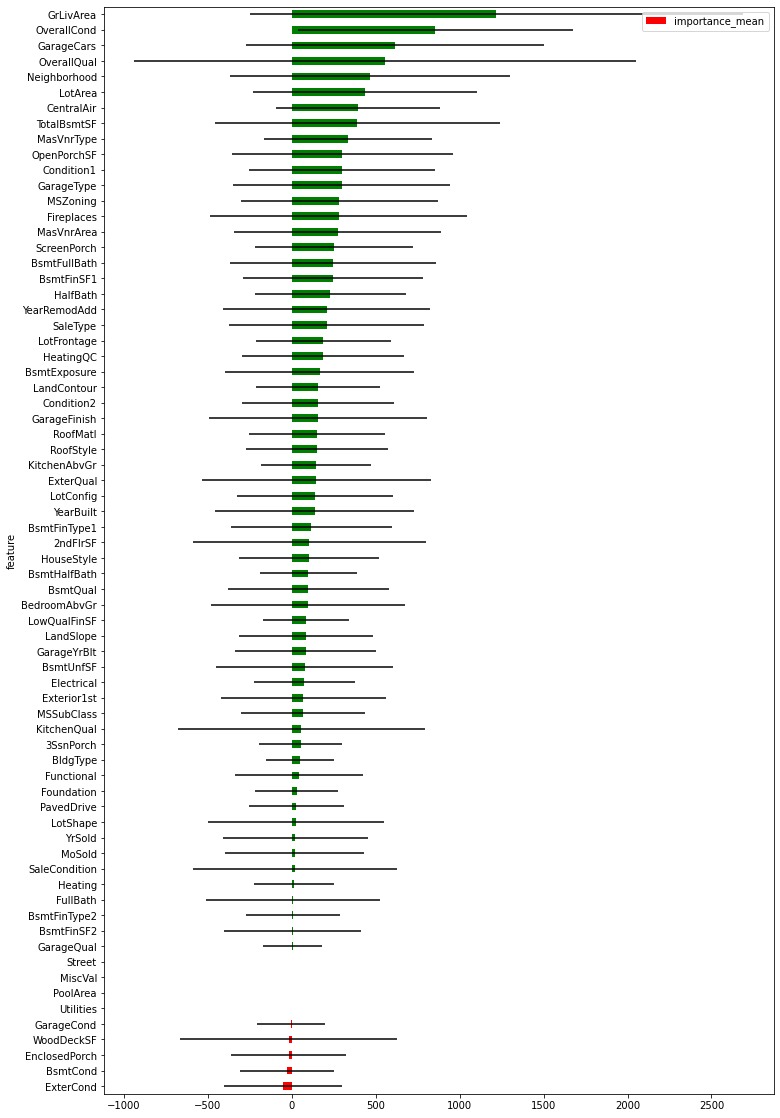

In [59]:
# define the binary target and the features
dataset = Dataset(df=df, target="SalePrice", features=[col for col in df.columns if col != "SalePrice"])

# define the validation scheme and scorer. The default model is LightGBM
lofo_imp = LOFOImportance(dataset, cv=20, scoring="neg_mean_absolute_error")

# get the mean and standard deviation of the importances in pandas format
importance_df = lofo_imp.get_importance()

# plot the means and standard deviations of the importances
plot_importance(importance_df, figsize=(12, 20))

In [60]:
importance_df

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3,val_imp_4,val_imp_5,val_imp_6,val_imp_7,val_imp_8,val_imp_9,val_imp_10,val_imp_11,val_imp_12,val_imp_13,val_imp_14,val_imp_15,val_imp_16,val_imp_17,val_imp_18,val_imp_19
54,GrLivArea,1218.5718,1469.8960,3430.9612,2660.2490,1616.9814,-137.1400,1348.3690,-1575.4163,2505.2174,2121.7796,-561.4638,1066.5060,1469.1394,1635.2612,2874.3990,101.3704,576.1668,1090.1730,414.6047,-386.2178,4454.1940,-333.6982
62,OverallCond,855.5805,818.6333,505.5783,-167.8594,1161.7917,1072.5580,694.4777,1829.7370,-124.9310,2381.1483,-305.2878,1256.8981,-271.8113,426.4440,294.8510,63.5236,2100.8659,1388.9735,922.0382,1582.2120,1981.4258,318.9763
39,GarageCars,613.4692,886.2277,1011.4323,692.0928,2532.7395,1060.2118,430.2636,715.2606,-709.5630,2364.0740,-618.9667,-150.4851,86.8871,1732.2197,-340.9320,508.5771,1313.3954,272.8510,-224.9749,141.5565,1314.1214,138.6219
36,OverallQual,556.2264,1493.8114,2085.9901,1197.8598,1081.4701,2039.4277,-33.2578,2716.1075,1418.2181,1538.9746,2648.8118,-934.5221,-784.2260,1001.4505,1761.2422,-2867.9323,652.4760,-355.4400,1369.4420,-1718.0443,-1231.7511,-461.7683
43,Neighborhood,466.9698,835.6065,993.8287,339.3373,-1295.1314,405.0665,1233.4246,606.6721,-241.7480,1827.8866,519.0809,294.1299,457.5717,212.8401,739.1215,-395.3302,1371.8161,-244.3596,1997.3720,1369.3652,-978.3416,126.7934
51,LotArea,435.5984,668.7058,690.2313,1360.0707,670.1558,1172.6129,-20.0366,1499.4443,-270.7204,1084.6069,695.7317,482.4047,77.0536,-581.2433,-416.4233,26.1990,1324.3898,-332.3497,44.9121,1052.5637,-582.9528,735.3183
5,CentralAir,392.7586,488.1685,328.1925,223.3594,974.1035,466.6104,89.8405,487.7179,-23.3117,1638.4755,31.4354,304.9139,-423.1534,905.5491,786.1995,-192.1121,355.1097,535.8240,700.1828,901.7177,109.9923,-345.4747
13,TotalBsmtSF,389.2036,848.2243,999.9079,1294.8190,658.2023,394.9883,1137.9425,72.9537,-1272.0398,2412.9908,42.0555,-260.7217,883.9093,-175.1363,522.8088,-502.6889,573.4626,-115.0298,165.1291,1714.3664,68.0378,-831.8862
55,MasVnrType,334.2571,500.4152,526.5193,185.7048,915.7569,366.4761,253.2774,488.9169,-181.1324,1312.8269,-270.8236,472.1646,-431.7547,1009.2400,628.7749,-267.4411,1223.8781,302.6677,-272.7773,490.5618,75.1141,-142.8092
9,OpenPorchSF,301.0904,657.9412,966.3964,861.1397,627.2929,236.5148,686.0319,133.2405,333.8461,1724.8686,83.3214,654.9786,-703.4075,182.0599,912.5171,460.2120,468.4450,594.8826,137.4544,-430.9321,-665.2536,-1241.8010


In [61]:
importance_df.feature.tolist()

['GrLivArea',
 'OverallCond',
 'GarageCars',
 'OverallQual',
 'Neighborhood',
 'LotArea',
 'CentralAir',
 'TotalBsmtSF',
 'MasVnrType',
 'OpenPorchSF',
 'Condition1',
 'GarageType',
 'MSZoning',
 'Fireplaces',
 'MasVnrArea',
 'ScreenPorch',
 'BsmtFullBath',
 'BsmtFinSF1',
 'HalfBath',
 'YearRemodAdd',
 'SaleType',
 'LotFrontage',
 'HeatingQC',
 'BsmtExposure',
 'LandContour',
 'Condition2',
 'GarageFinish',
 'RoofMatl',
 'RoofStyle',
 'KitchenAbvGr',
 'ExterQual',
 'LotConfig',
 'YearBuilt',
 'BsmtFinType1',
 '2ndFlrSF',
 'HouseStyle',
 'BsmtHalfBath',
 'BsmtQual',
 'BedroomAbvGr',
 'LowQualFinSF',
 'LandSlope',
 'GarageYrBlt',
 'BsmtUnfSF',
 'Electrical',
 'Exterior1st',
 'MSSubClass',
 'KitchenQual',
 '3SsnPorch',
 'BldgType',
 'Functional',
 'Foundation',
 'PavedDrive',
 'LotShape',
 'YrSold',
 'MoSold',
 'SaleCondition',
 'Heating',
 'FullBath',
 'BsmtFinType2',
 'BsmtFinSF2',
 'GarageQual',
 'Street',
 'MiscVal',
 'PoolArea',
 'Utilities',
 'GarageCond',
 'WoodDeckSF',
 'EnclosedP

In [62]:
finales=['GrLivArea',
 'OverallCond',
 'GarageCars',
 'OverallQual',
 'Neighborhood',
 'LotArea',
 'CentralAir',
 'TotalBsmtSF',
 'MasVnrType',
 'OpenPorchSF',
 'Condition1',
 'GarageType',
 'MSZoning',
 'Fireplaces',
 'MasVnrArea',
 'BsmtFinSF1',
 'ScreenPorch',
 'BsmtFullBath',
 'HalfBath',
 'SaleType',
 'YearRemodAdd',
 'LotFrontage',
 'HeatingQC',
 'BsmtExposure',
 'LandContour',
 'GarageFinish',
 'Condition2',
 'RoofStyle',
 'RoofMatl',
 'KitchenAbvGr',
 'ExterQual',
 'LotConfig',
 'YearBuilt',
 'BsmtFinType1',
 '2ndFlrSF',
 'HouseStyle',
 'BsmtQual',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'GarageYrBlt',
 'LandSlope',
 'LowQualFinSF',
 'BsmtUnfSF',
 'Electrical',
 'Exterior1st',
 'MSSubClass',
 'KitchenQual',
 '3SsnPorch',
 'BldgType',
 'Functional',
 'PavedDrive',
 'Foundation',
 'LotShape',
 'YrSold',
 'MoSold',
 'SaleCondition',
 'FullBath',
 'Heating',
 'BsmtFinType2',
 'BsmtFinSF2',
 'GarageQual']

In [63]:
X_train_f=X_train[finales]

In [64]:
X_test_f=X_test[finales]

In [65]:
X_test_f

,GrLivArea,OverallCond,GarageCars,OverallQual,Neighborhood,LotArea,CentralAir,TotalBsmtSF,MasVnrType,OpenPorchSF,Condition1,GarageType,MSZoning,Fireplaces,MasVnrArea,BsmtFinSF1,ScreenPorch,BsmtFullBath,HalfBath,SaleType,YearRemodAdd,LotFrontage,HeatingQC,BsmtExposure,LandContour,GarageFinish,Condition2,RoofStyle,RoofMatl,KitchenAbvGr,ExterQual,LotConfig,YearBuilt,BsmtFinType1,2ndFlrSF,HouseStyle,BsmtQual,BsmtHalfBath,BedroomAbvGr,GarageYrBlt,LandSlope,LowQualFinSF,BsmtUnfSF,Electrical,Exterior1st,MSSubClass,KitchenQual,3SsnPorch,BldgType,Functional,PavedDrive,Foundation,LotShape,YrSold,MoSold,SaleCondition,FullBath,Heating,BsmtFinType2,BsmtFinSF2,GarageQual
0,-0.8776,1.0000,-1.0000,-0.5000,146002.2752,0.5295,1.0000,-0.2179,2.0000,-0.3676,142944.3317,1.0000,2.0000,-1.0000,0.0000,0.1186,120.0000,0.0000,0.0000,173407.7667,-0.8919,0.5789,4.0000,3.0000,3.0000,2.0000,181169.2339,1.0000,179804.4580,0.0000,3.0000,4.0000,-0.2609,4.0000,0.0000,175992.2671,3.0000,0.0000,-1.0000,-0.4872,0.0000,0.0000,-0.3547,4.0000,213669.3124,-0.6000,3.0000,0.0000,0.0000,6.0000,2.0000,1.0000,3.0000,1.0000,0.0000,4.0000,-1.0000,1.0000,3.0000,144.0000,4.0000
1,-0.2086,1.0000,-1.0000,0.0000,146002.2752,1.1829,1.0000,0.6716,1.0000,0.1618,184492.6576,1.0000,3.0000,-1.0000,0.6575,0.7575,0.0000,0.0000,1.0000,173407.7667,-0.9730,0.6316,4.0000,3.0000,3.0000,2.0000,181169.2339,3.0000,179804.4580,0.0000,3.0000,0.0000,-0.3261,0.0000,0.0000,175992.2671,3.0000,0.0000,0.0000,-0.5641,0.0000,0.0000,-0.1222,4.0000,149991.7884,-0.6000,2.0000,0.0000,0.0000,6.0000,2.0000,1.0000,0.0000,1.0000,0.0000,4.0000,-1.0000,1.0000,5.0000,0.0000,4.0000
2,0.2549,0.0000,0.0000,-0.5000,192705.3399,1.0750,1.0000,-0.1264,2.0000,0.1324,184492.6576,1.0000,3.0000,0.0000,0.0000,0.5721,0.0000,0.0000,1.0000,173407.7667,0.1081,0.2632,2.0000,3.0000,3.0000,0.0000,181169.2339,1.0000,179804.4580,0.0000,3.0000,4.0000,0.5217,2.0000,0.9629,209986.4489,2.0000,0.0000,0.0000,0.4359,0.0000,0.0000,-0.5821,4.0000,213669.3124,0.2000,3.0000,0.0000,0.0000,6.0000,2.0000,2.0000,0.0000,1.0000,-1.0000,4.0000,0.0000,1.0000,5.0000,0.0000,4.0000
3,0.2163,1.0000,0.0000,0.0000,192705.3399,0.1234,1.0000,-0.1303,1.0000,0.1618,184492.6576,1.0000,3.0000,0.0000,0.1218,0.3068,0.0000,0.0000,1.0000,173407.7667,0.1081,0.4737,0.0000,3.0000,3.0000,0.0000,181169.2339,1.0000,179804.4580,0.0000,3.0000,4.0000,0.5435,2.0000,0.9313,209986.4489,3.0000,0.0000,0.0000,0.4615,0.0000,0.0000,-0.2624,4.0000,213669.3124,0.2000,2.0000,0.0000,0.0000,6.0000,2.0000,2.0000,0.0000,1.0000,0.0000,4.0000,0.0000,1.0000,5.0000,0.0000,4.0000
4,-0.2843,0.0000,0.0000,1.0000,305515.2383,-1.1051,1.0000,0.5741,2.0000,0.8382,184492.6576,1.0000,3.0000,-1.0000,0.0000,-0.1692,144.0000,0.0000,0.0000,173407.7667,-0.0541,-1.3684,0.0000,3.0000,1.0000,1.0000,181169.2339,1.0000,179804.4580,0.0000,2.0000,4.0000,0.4130,0.0000,0.0000,175992.2671,2.0000,0.0000,-1.0000,0.3077,0.0000,0.0000,0.9222,4.0000,163157.4672,1.4000,2.0000,0.0000,4.0000,6.0000,2.0000,2.0000,0.0000,1.0000,-1.6667,4.0000,0.0000,1.0000,5.0000,0.0000,4.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.5747,2.0000,-2.0000,-1.0000,103151.1775,-1.8633,1.0000,-0.8866,2.0000,-0.3676,184492.6576,1.0000,4.0000,-1.0000,0.0000,-0.5384,0.0000,0.0000,1.0000,173407.7667,-0.6486,-2.5263,2.0000,3.0000,3.0000,2.0000,181169.2339,1.0000,179804.4580,0.0000,3.0000,4.0000,-0.0652,5.0000,0.7500,209986.4489,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1171,4.0000,230871.7935,2.2000,3.0000,0.0000,3.0000,6.0000,2.0000,1.0000,3.0000,-1.0000,0.0000,4.0000,-1.0000,1.0000,5.0000,0.0000,4.0000
1455,-0.5747,0.0000,-1.0000,-1.0000,103151.1775,-1.8736,1.0000,-0.8866,2.0000,-0.0147,184492.6576,4.0000,4.0000,-1.0000,0.0000,-0.1846,0.0000,0.0000,1.0000,173407.7667,-0.6486,-2.5263,4.0000,3.0000,3.0000,2.0000,181169.2339,1.0000,179804.4580,0

In [66]:
X_train_f

,GrLivArea,OverallCond,GarageCars,OverallQual,Neighborhood,LotArea,CentralAir,TotalBsmtSF,MasVnrType,OpenPorchSF,Condition1,GarageType,MSZoning,Fireplaces,MasVnrArea,BsmtFinSF1,ScreenPorch,BsmtFullBath,HalfBath,SaleType,YearRemodAdd,LotFrontage,HeatingQC,BsmtExposure,LandContour,GarageFinish,Condition2,RoofStyle,RoofMatl,KitchenAbvGr,ExterQual,LotConfig,YearBuilt,BsmtFinType1,2ndFlrSF,HouseStyle,BsmtQual,BsmtHalfBath,BedroomAbvGr,GarageYrBlt,LandSlope,LowQualFinSF,BsmtUnfSF,Electrical,Exterior1st,MSSubClass,KitchenQual,3SsnPorch,BldgType,Functional,PavedDrive,Foundation,LotShape,YrSold,MoSold,SaleCondition,FullBath,Heating,BsmtFinType2,BsmtFinSF2,GarageQual
0,0.3801,0.0000,0.0000,0.5000,180921.1959,-0.2541,1.0000,-0.2697,1.0000,0.5294,180921.1959,1.0000,3.0000,-1.0000,1.1933,0.4528,0.0000,1.0000,1.0000,180921.1959,0.2432,-0.2105,0.0000,3.0000,3.0000,1.0000,180921.1959,1.0000,180921.1959,0.0000,2.0000,4.0000,0.6522,2.0000,1.1731,180921.1959,2.0000,0.0000,0.0000,0.5897,0.0000,0.0000,-0.5598,4.0000,180921.1959,0.2000,2.0000,0.0000,0.0000,6.0000,2.0000,2.0000,3.0000,0.0000,-1.3333,4.0000,0.0000,1.0000,5.0000,0.0000,4.0000
1,-0.3121,3.0000,0.0000,0.0000,180921.1959,0.0300,1.0000,0.5383,2.0000,-0.3676,180921.1959,1.0000,3.0000,0.0000,0.0000,0.8347,0.0000,0.0000,0.0000,194710.5979,-0.4865,0.5789,0.0000,1.0000,3.0000,1.0000,194710.5979,1.0000,194710.5979,0.0000,3.0000,2.0000,0.0652,0.0000,0.0000,180921.1959,2.0000,1.0000,0.0000,-0.1026,0.0000,0.0000,-0.3308,4.0000,180921.1959,-0.6000,3.0000,0.0000,0.0000,6.0000,2.0000,1.0000,3.0000,-0.5000,-0.3333,4.0000,0.0000,1.0000,5.0000,0.0000,4.0000
2,0.4975,0.0000,0.0000,0.5000,194710.5979,0.4376,1.0000,-0.1423,1.0000,0.2500,194710.5979,1.0000,3.0000,0.0000,0.9863,0.1439,0.0000,1.0000,1.0000,190307.0653,0.2162,-0.0526,0.0000,2.0000,3.0000,1.0000,190307.0653,1.0000,190307.0653,0.0000,2.0000,4.0000,0.6087,2.0000,1.1896,194710.5979,2.0000,0.0000,0.0000,0.5385,0.0000,0.0000,-0.0744,4.0000,194710.5979,0.2000,2.0000,0.0000,0.0000,6.0000,2.0000,2.0000,0.0000,0.0000,1.0000,4.0000,0.0000,1.0000,5.0000,0.0000,4.0000
3,0.3909,0.0000,1.0000,0.5000,180921.1959,0.0177,1.0000,-0.4687,2.0000,0.1471,204307.0653,5.0000,3.0000,0.0000,0.0000,-0.2352,0.0000,1.0000,0.0000,198605.2990,-0.6486,-0.4737,2.0000,3.0000,3.0000,2.0000,198605.2990,1.0000,198605.2990,0.0000,3.0000,0.0000,-1.2609,0.0000,1.0385,204307.0653,3.0000,0.0000,0.0000,0.4615,0.0000,0.0000,0.1068,4.0000,180921.1959,0.4000,2.0000,0.0000,0.0000,6.0000,2.0000,0.0000,0.0000,-1.0000,-1.3333,0.0000,-1.0000,1.0000,5.0000,0.0000,4.0000
4,1.1340,0.0000,1.0000,1.0000,180921.1959,1.1812,1.0000,0.3055,1.0000,0.8676,188230.2990,1.0000,3.0000,0.0000,2.1309,0.3812,0.0000,1.0000,1.0000,186884.2392,0.1622,0.7895,0.0000,0.0000,3.0000,1.0000,186884.2392,1.0000,186884.2392,0.0000,2.0000,2.0000,0.5870,2.0000,1.4464,188230.2990,2.0000,0.0000,1.0000,0.5128,0.0000,0.0000,0.0214,4.0000,204307.0653,0.2000,2.0000,0.0000,0.0000,6.0000,2.0000,2.0000,0.0000,0.0000,2.0000,4.0000,0.0000,1.0000,5.0000,0.0000,4.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.2827,0.0000,0.0000,0.0000,192929.4582,-0.3857,1.0000,-0.0766,2.0000,0.2206,184477.7995,1.0000,3.0000,0.0000,0.0000,-0.5384,0.0000,0.0000,1.0000,173349.1078,0.1622,-0.3684,0.0000,3.0000,3.0000,1.0000,181144.7517,1.0000,179775.0155,0.0000,3.0000,4.0000,0.5652,5.0000,0.9533,209937.9644,2.0000,0.0000,0.0000,0.4872,0.0000,0.0000,0.8128,4.0000,213744.3984,0.2000,3.0000,0.0000,0.0000,6.0000,2.0000,2.0000,3.0000,-0.5000,0.6667,4.0000,0.0000,1.0000,5.0000,0.0000,4.0000
1456,0.9409,1.0000,0.0000,0.0000,188651.7287,0.9132,1.0000,1.0955,3.0000,-0.3676,184470.2595,1.0000,3.0000,1.0000,0.7245,0.5707,0.0000,1.0000,0.0000,173350.4139,-0.1622,0.8421,4.0000,3.0000,3.0000,2.0000,181140.4904,1.0000,179771.6787,0.0000,3.0000,4.0000,0.1087,0.0000

In [67]:
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
import xgboost as xgb

In [68]:


# scoring = {'AUC': 'roc_auc', 'NLL': 'neg_log_loss'}

param_grid= {

#     "selectkbest__k": list(range(5,10,1)),

    "max_depth":[3,4,5,6,7,8,9,10,20],

    "learning_rate":[0.05,0.1,0.3],

    

    "n_estimators": [1000],

    "scale_pos_weight": [1,2],

    "min_child_weight": [0,1,3,5],

    "gamma": [0,0.25,1.0],

    "reg_lambda":[0,1.0,10.0]

   

    

}

 

 

 

# kbest = SelectKBest()### modelo con ROC_AUC 10 variables

model=xgb.XGBRegressor(seed=42)

 

 

sh4=HalvingGridSearchCV(model, param_grid=param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=10,  verbose=True,

                        min_resources="exhaust", factor= 4 )

sh4.fit(X_train_f, y_train)

n_iterations: 4
n_required_iterations: 6
n_possible_iterations: 4
min_resources_: 20
max_resources_: 1460
aggressive_elimination: False
factor: 4
----------
iter: 0
n_candidates: 1944
n_resources: 20
Fitting 10 folds for each of 1944 candidates, totalling 19440 fits
----------
iter: 1
n_candidates: 486
n_resources: 80
Fitting 10 folds for each of 486 candidates, totalling 4860 fits
----------
iter: 2
n_candidates: 122
n_resources: 320
Fitting 10 folds for each of 122 candidates, totalling 1220 fits
----------
iter: 3
n_candidates: 31
n_resources: 1280
Fitting 10 folds for each of 31 candidates, totalling 310 fits


HalvingGridSearchCV(cv=10,
                    estimator=XGBRegressor(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None...
                                           num_parallel_tree=None,
                                           predictor=None, random_stat

In [69]:
print("Best: %f using %s" % (sh4.best_score_, sh4.best_params_))

Best: -16017.378806 using {'gamma': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 1000, 'reg_lambda': 1.0, 'scale_pos_weight': 1}


In [70]:
sh4.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=1.0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1.0, ...)

In [71]:
sh4_best = sh4.best_estimator_

In [72]:
Y_pred = sh4_best.predict(X_test_f)

In [73]:
Y_pred

array([123474.9 , 151362.47, 185502.33, ..., 165299.31, 121704.77,
       211264.48], dtype=float32)

In [74]:
submission = pd.DataFrame({
        "Id": identidad,
        "SalePrice": Y_pred
    })
submission.to_csv('submission_1.csv', index=False)

In [75]:
from joblib import dump , load 
estimator = sh4.best_estimator_
dump(estimator, "your-model_1.joblib")
estimator = load("your-model_1.joblib")

In [76]:
estimator

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=1.0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1.0, ...)